# 로지스틱 회귀

- 이진 분류 문제에서 클래스 확률을 예측합니다.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 럭키백의 확률

### 데이터 준비하기

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
print(pd.unique(fish['Species']))
# unique()는 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# diagonal은 대각선
# 왜 넘파이로?

In [4]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
# 표준화 처리
ss = StandardScaler()
ss.fit(train_input)

print(train_input)

train_scaled = ss.transform(train_input)
# print(train_input)
test_scaled = ss.transform(test_input) # 테스트는 fit말고 transform만..

[[7.20000e+02 3.50000e+01 4.06000e+01 1.63618e+01 6.09000e+00]
 [5.00000e+02 4.50000e+01 4.80000e+01 6.96000e+00 4.89600e+00]
 [7.50000e+00 1.05000e+01 1.16000e+01 1.97200e+00 1.16000e+00]
 [1.10000e+02 2.20000e+01 2.35000e+01 5.52250e+00 3.99500e+00]
 [1.40000e+02 2.07000e+01 2.32000e+01 8.53760e+00 3.29440e+00]
 [6.90000e+01 1.82000e+01 2.03000e+01 5.29830e+00 2.82170e+00]
 [1.10000e+02 2.10000e+01 2.25000e+01 5.69250e+00 3.55500e+00]
 [6.20000e+02 3.45000e+01 3.97000e+01 1.55227e+01 5.28010e+00]
 [1.30000e+02 2.13000e+01 2.28000e+01 6.38400e+00 3.53400e+00]
 [8.50000e+01 2.00000e+01 2.10000e+01 5.08200e+00 2.77200e+00]
 [6.85000e+02 3.65000e+01 3.90000e+01 1.08810e+01 6.86400e+00]
 [5.00000e+02 3.10000e+01 3.62000e+01 1.43714e+01 4.81460e+00]
 [5.14000e+02 3.28000e+01 3.40000e+01 1.00300e+01 6.01800e+00]
 [2.00000e+02 2.30000e+01 2.58000e+01 1.03458e+01 3.66360e+00]
 [1.00000e+03 4.40000e+01 4.66000e+01 1.24888e+01 7.59580e+00]
 [7.14000e+02 3.60000e+01 4.15000e+01 1.65170e+01 5.851

### k-최근접 이웃 분류기의 확률 예측

In [14]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
# 표준화 처리한 거를 최근접 이웃 분류기에 학습.(train만)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [15]:
print(kn.classes_)
# bream이 첫번째 클래스, parkki가 두번쨰 클래스가 되는 식. 알파벳 순

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [18]:
test_scaled[:5]
# ['Weight','Length','Diagonal','Height','Width']

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

In [17]:
print(kn.predict(test_scaled[:5])) # 타깃값으로 예측을 출력한다.
# 첫번째 값은 perch 두번째 값은 smelt, 세번째 값은 pike 로 예측..
# perch = [-0.88741352*Weight, -0.91804565*Length , -1.03098914*Diagonal , -0.90464451*Height , -0.80762518*Width]

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [19]:
import numpy as np
# 5개 샘플에 대한 예측은 predict_proba() 메서드로 클래스별 확률값을 반환.
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # 소수점 넷째자리까지 표기, 다섯째부터 반올림.
# 각 값들은 클래스별 맞을 확률
# 첫번째 인덱스가 bream일 확률인데 0이다.
# 첫번째 행이 perch, 두번째가 smelt, 네번째, 다섯번째는 67% 확률로 perch

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [24]:
distances, indexes = kn.kneighbors(test_scaled[3:4]) # 67% 확률로 perch인 녀석
                                                        # 주변 거리, 인덱스
indexes

array([[104, 115, 106]], dtype=int64)

In [26]:
distances 

array([[0.20774583, 0.24862983, 0.33682411]])

In [25]:
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀

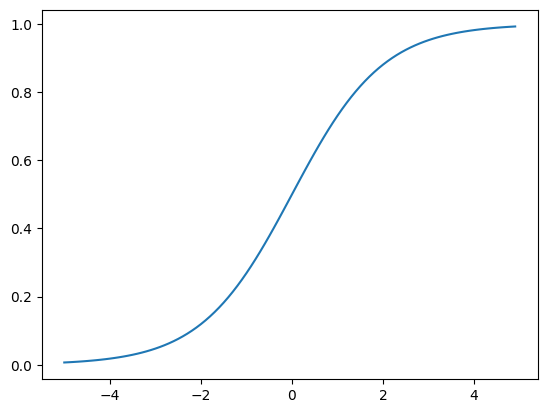

In [27]:
# 로지스틱 회귀는 이름은 회귄데, 분류모델. 선형회귀와 동일하게 선형 회귀와
# 동일하게 선형 방정식을 학습한다.
# Z = a * weight + b * length + c * diagonal + d * height + e * width + f
# Z는 어던 값도 될 수 있지만, 확률이 되려면 0~1사이 값이 되어야 하기에
# 시그모이드 함수 또는 로지스틱 함수를 사용해야 함.

import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z)) # 시그모이드

plt.plot(z, phi)
plt.show() # 값이 0~1 사이로 
# 딱 0.5이면 라이브러리마다 다르지만, 사이킷런은 0.5일 떄 음성 클래스로 판단.

### 로지스틱 회귀로 이진 분류 수행하기

In [28]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [33]:
# 도미와 빙어 행만 골라낼 것. 비교 연산자를 사용하면 모두 True로 만들 수 있다.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
#print(train_bream_smelt)
target_bream_smelt = train_target[bream_smelt_indexes]

In [31]:
from sklearn.linear_model import LogisticRegression # 선형 모델이 맞다.

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [32]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [34]:
print(lr.predict_proba(train_bream_smelt[:5])) # 예측 확률

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [35]:
print(lr.classes_)

['Bream' 'Smelt']


In [36]:
print(lr.coef_, lr.intercept_)
# z = -0.404 * weight - 0.576 * lenght - 0.66 dia - 1.01 * height - -0.732 * width - 2.161

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [37]:
decisions = lr.decision_function(train_bream_smelt[:5]) # 양성 클래스에 대한 Z값 계산
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [38]:
from scipy.special import expit
# 위 Z값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다.
# SCIPY에서 시그모이드 함수 가져와서 적용

print(expit(decisions))
# 두번째 녀석만 SMELT

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중 분류 수행하기

In [39]:
lr = LogisticRegression(C=20, max_iter=1000) # 다중 7개의 생선분류
# max_iter 반복횟수, C는 규제고 적을수록 규제가 세다.
lr.fit(train_scaled, train_target) # 7개의 생선 데이터들이 들어있는
# train만 학습시키고 아래 점수들

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [41]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [42]:
proba = lr.predict_proba(test_scaled[:5]) # 예측 확률
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [43]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [47]:
print(lr.coef_.shape, lr.intercept_.shape)
# 5개의 특성을 사용하므로 5개 열
# 행이 7개씩이다.
# => 다중분류는 z값을 클래스마다 계산해준다.
# 당연히 가장 높은 z값을 출력하는 클래스가 예측 클래스가 되는 거고,
# 이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1 사이의 값으로 변환
# 다중 분류는 이와 달리 소프트맥스 함수를 사용하여 7개의 z값을 확률로 변환합니다.

(7, 5) (7,)


In [45]:
decision = lr.decision_function(test_scaled[:5])
# 결정함수로 z1~z7까지의 값을 구한 다음
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [46]:
from scipy.special import softmax # 소프트맥스 함수를 사용하여 확률로 바꿔보기
                                    # 확률이니까 0~1사이로 값을 변환.
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
